In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\\project cuối khóa SIC\\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


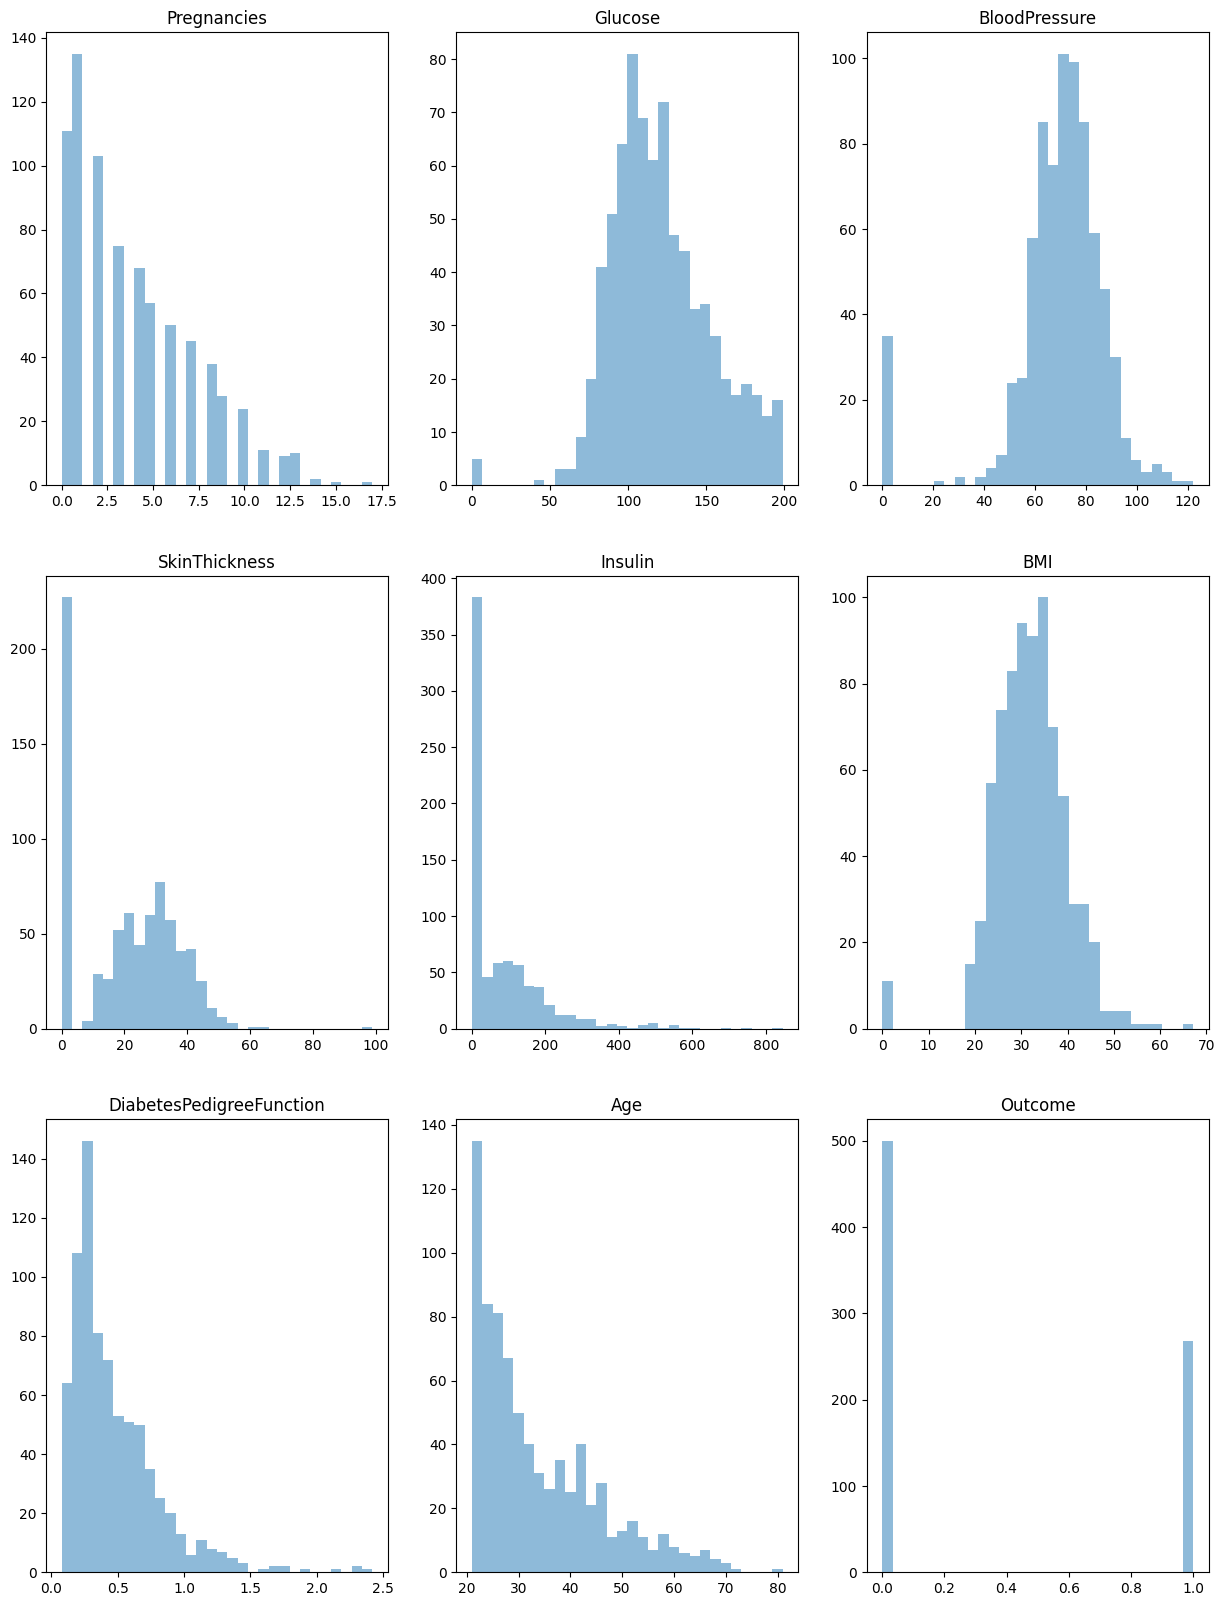

In [7]:
def drawHist(df):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
    p = 0
    columns = df.columns.tolist()
    for i in range(3):
        for j in range(3):
            if p < len(columns):
                axes[i, j].hist(df[columns[p]], bins=30, density=False, alpha=0.5)
                axes[i, j].set_title(columns[p])
                p += 1
            else:
                axes[i, j].axis('off')
    plt.show()

drawHist(df)

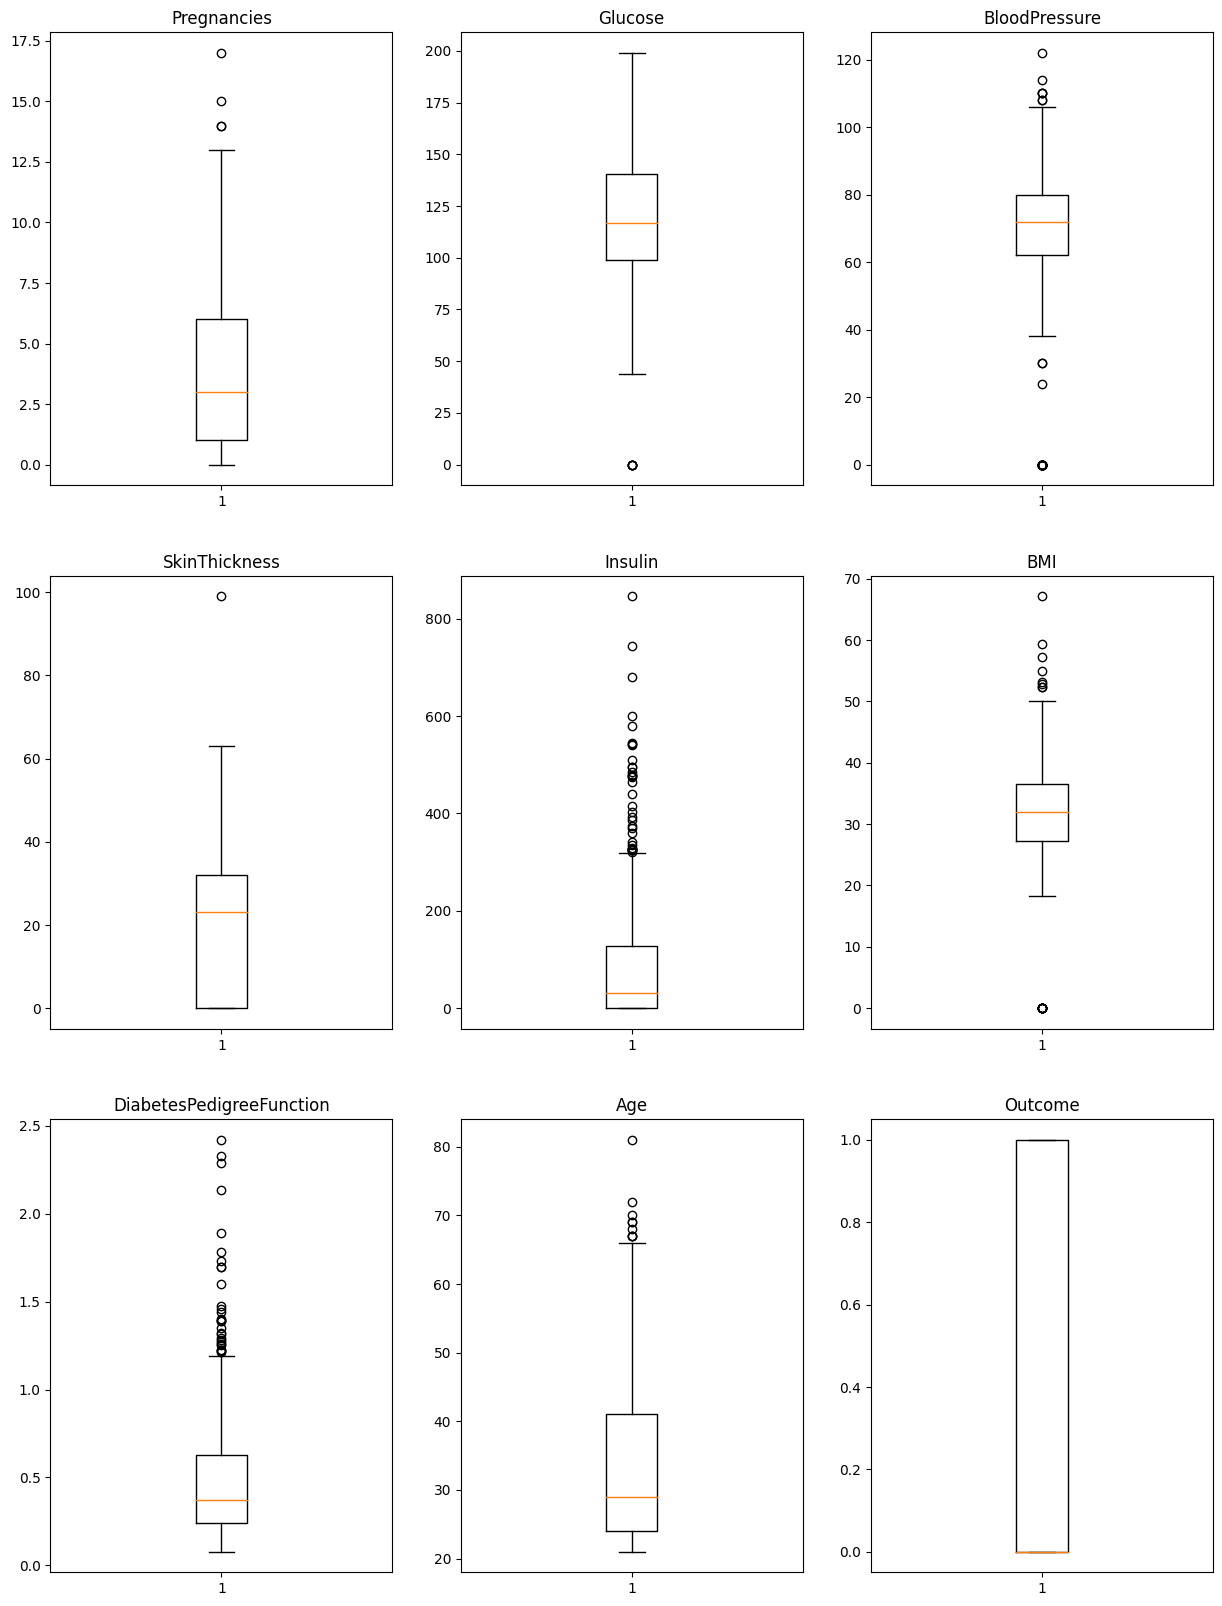

In [8]:
def drawBox(df):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
    p = 0
    columns = df.columns.tolist()
    for i in range(3):
        for j in range(3):
            if p < len(columns):
                axes[i, j].boxplot(df[columns[p]].dropna())  # Bỏ qua giá trị NaN khi vẽ boxplot
                axes[i, j].set_title(columns[p])
                p += 1
            else:
                axes[i, j].axis('off')
    plt.show()

drawBox(df)

In [9]:
#thay giá trị 0 của (glucose, bloodpressure, skinthickness, BMI, insulin) sang NaN  
replaced_columns = ['Glucose', 'BloodPressure','SkinThickness','BMI','Insulin']
df[replaced_columns] = df[replaced_columns].replace(0, np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# %null data trong từng columns
for col in replaced_columns:
    null_data = df[col].isna().sum()
    null_percent = null_data/len(df)*100
    print(f"Column {col} has: {null_percent}% of null data")

Column Glucose has: 0.6510416666666667% of null data
Column BloodPressure has: 4.557291666666666% of null data
Column SkinThickness has: 29.557291666666668% of null data
Column BMI has: 1.4322916666666665% of null data
Column Insulin has: 48.69791666666667% of null data


<Axes: >

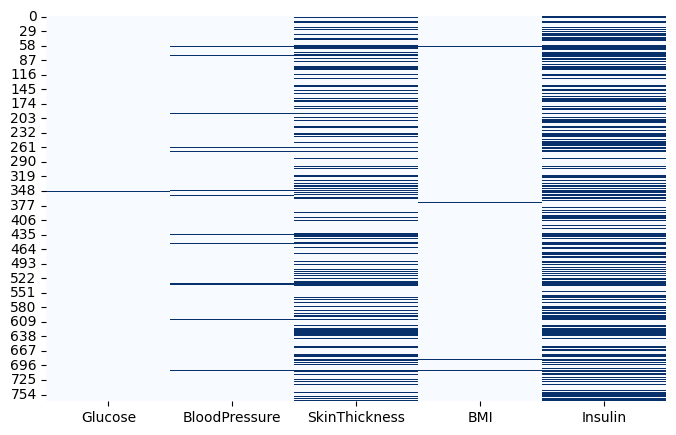

In [13]:
#phân bổ dữ liệu null của từng columns trong hàng 
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(df[replaced_columns].isna(), cmap="Blues", cbar=False)

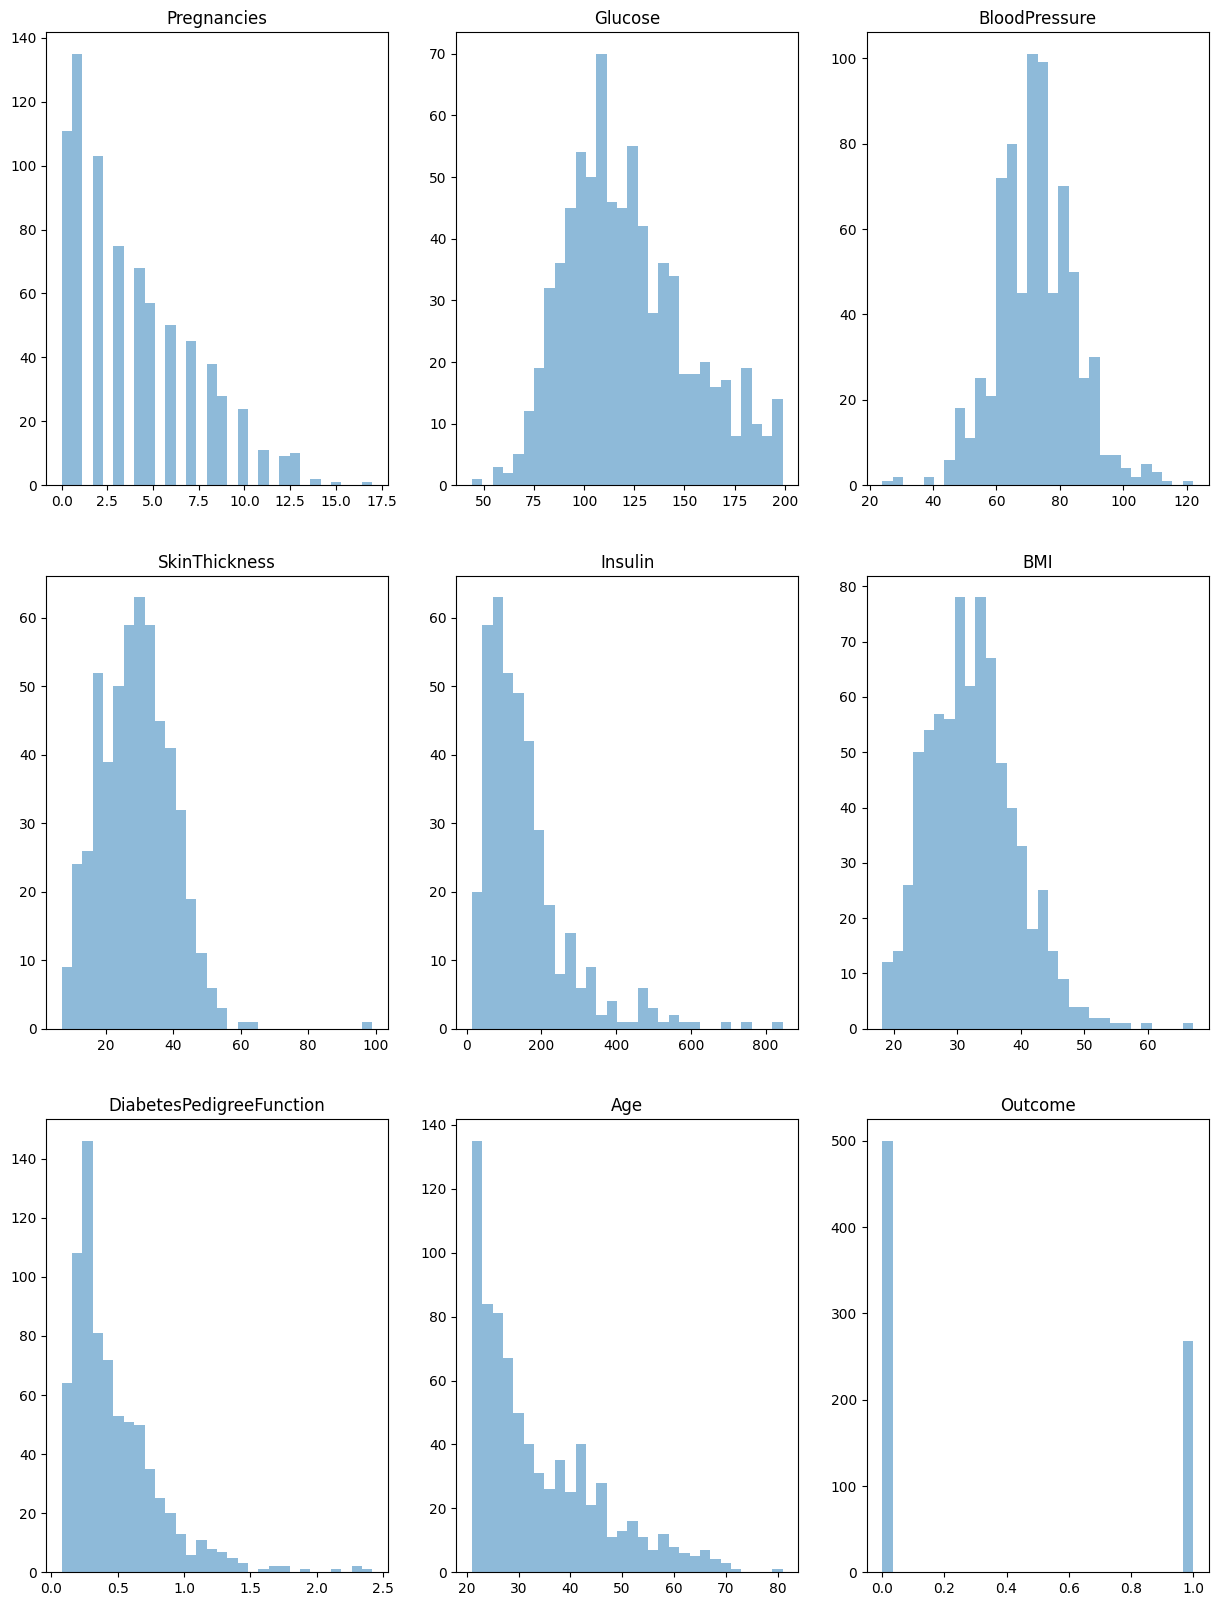

In [14]:
drawHist(df)

In [15]:
#Xử lý outlier

from scipy import stats

#Z_score
def remove_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    for col in columns:
        # Tính z-score cho các giá trị không null
        z_scores = stats.zscore(df_cleaned[col].dropna())
        abs_z_scores = np.abs(z_scores)
        # Xác định outliers
        upper_outliers = z_scores > threshold
        lower_outliers = z_scores < -threshold
        non_outliers = (abs_z_scores <= threshold)  # Không phải outliers
        # Lấy giá trị max và min của các giá trị không phải outliers
        max_non_outlier_value = df_cleaned[col].dropna()[non_outliers].max()
        min_non_outlier_value = df_cleaned[col].dropna()[non_outliers].min()
        # Thay thế outliers ở khoảng trên bằng max_non_outlier_value
        upper_outliers_indices = df_cleaned[col].dropna().index[upper_outliers]
        df_cleaned.loc[upper_outliers_indices, col] = max_non_outlier_value       
        # Thay thế outliers ở khoảng dưới bằng min_non_outlier_value
        lower_outliers_indices = df_cleaned[col].dropna().index[lower_outliers]
        df_cleaned.loc[lower_outliers_indices, col] = min_non_outlier_value
    return df_cleaned

columns_zscore = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df = remove_outliers_zscore(df, columns_zscore, threshold=3)

#IQR
def remove_outliers_iqr(df, columns, factor=1.5):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (IQR * factor)
        upper_bound = Q3 + (IQR * factor)  
        # Xác định các giá trị không phải outliers
        non_outliers = (df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)
        # Lấy giá trị max của các giá trị không phải outliers
        max_non_outlier_value = df_cleaned[col].dropna()[non_outliers].max()
        # Xác định outliers và thay thế bằng max_non_outlier_value
        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        df_cleaned.loc[outliers, col] = max_non_outlier_value
    return df_cleaned

columns_iqr = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
df = remove_outliers_iqr(df, columns_iqr, factor=1.5)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.834635,121.686763,72.410641,29.075786,146.461929,32.423118,0.458574,33.194010,0.348958
std,3.336808,30.535641,12.132319,10.105911,90.258463,6.796662,0.284717,11.611715,0.476951
min,0.000000,44.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,108.000000,60.000000,360.000000,53.200000,1.191000,66.000000,1.000000


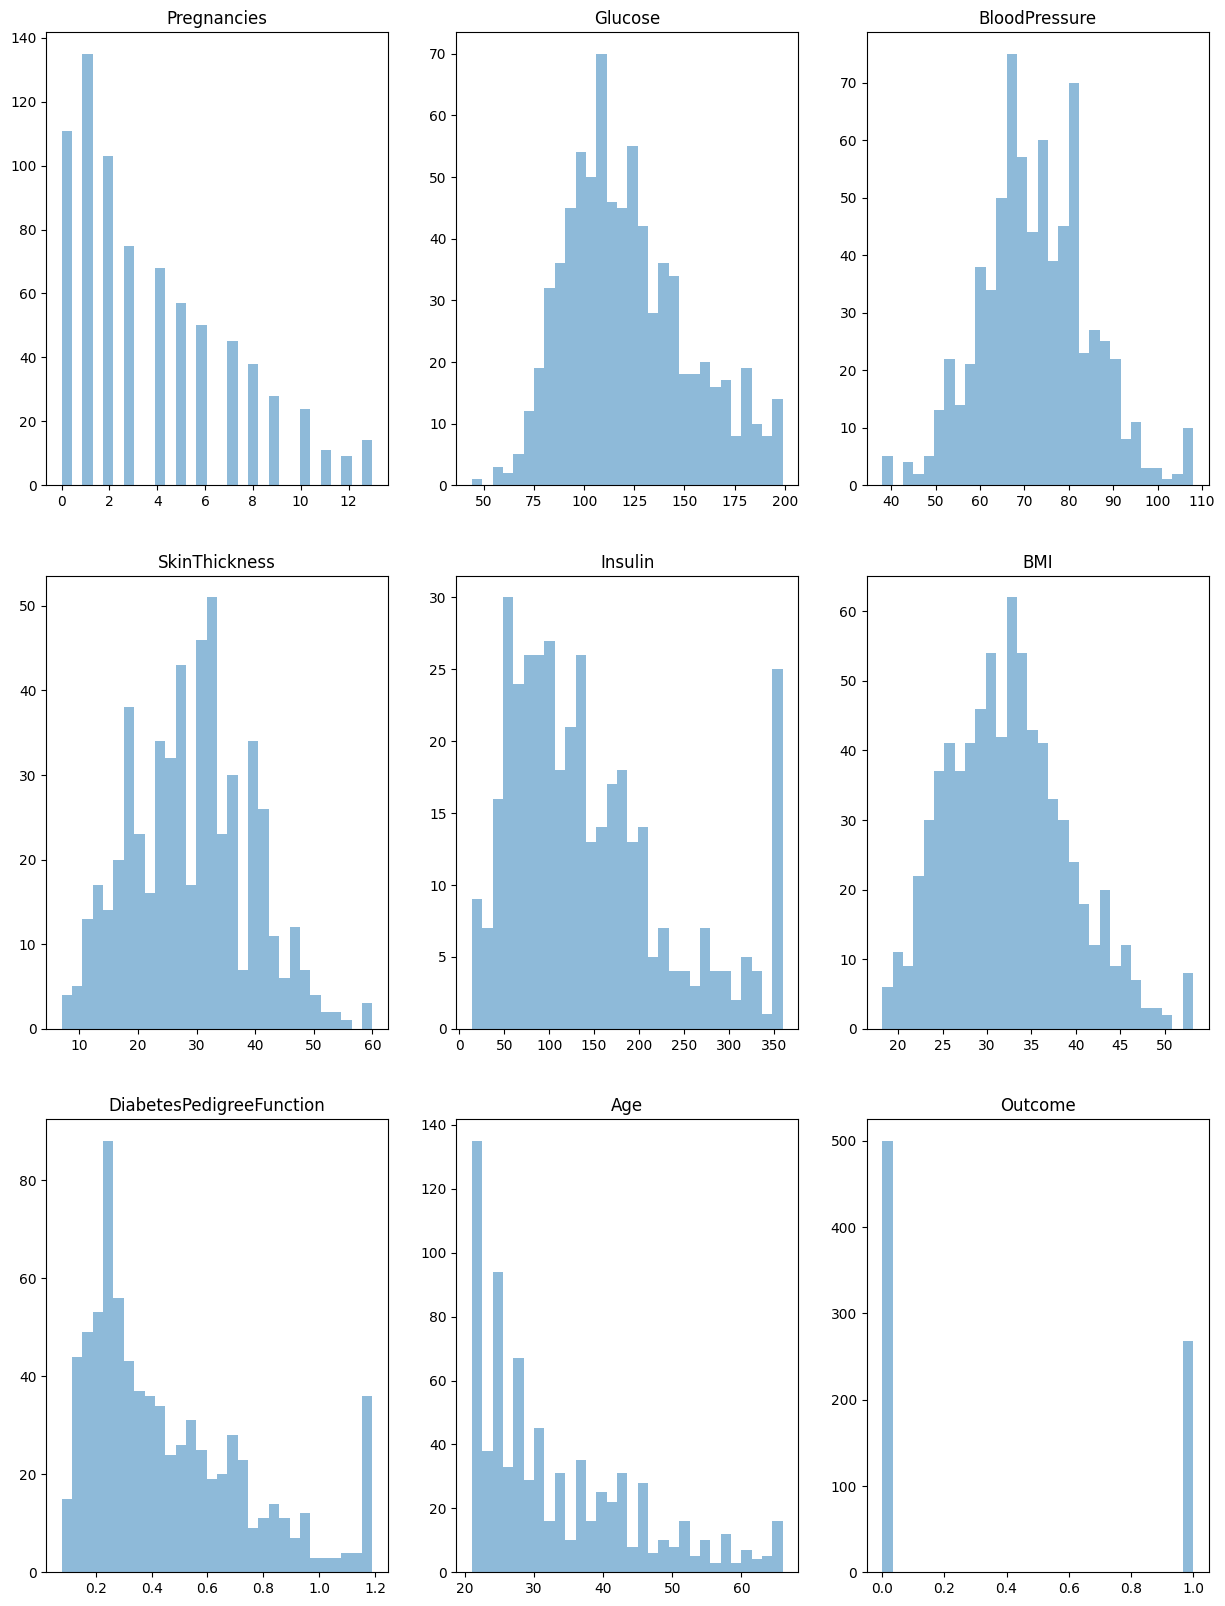

In [17]:
drawHist(df)

In [18]:
#split x(input) và y(output)
X = df.iloc[:, :-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [20]:
#Xử lý null
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Điền giá trị trung bình cho cột glucose (cột 1)
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
X[:, 1] = imputer_mean.fit_transform(X[:, [1]]).ravel()

#Xóa hàng null trong columns BMI 
mask = ~np.isnan(X[:, 5])  # Tạo mask để kiểm tra hàng nào có giá trị null trong cột BMI (cột 5)
      # Áp dụng mask lên cả X và y để đảm bảo đồng bộ
X = X[mask]
y = y[mask]

# Khởi tạo KNNImputer cho các cột Bloodpressure (2), Skinthickness (3), và Insulin (4)
knn_imputer = KNNImputer(n_neighbors=5)
X[:, [2, 3, 4]] = knn_imputer.fit_transform(X[:, [2, 3, 4]])

X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    243.0  33.6   
1          1.0     85.0           66.0           29.0    146.0  26.6   
2          8.0    183.0           64.0           28.0     99.4  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     1.191  33.0        1  


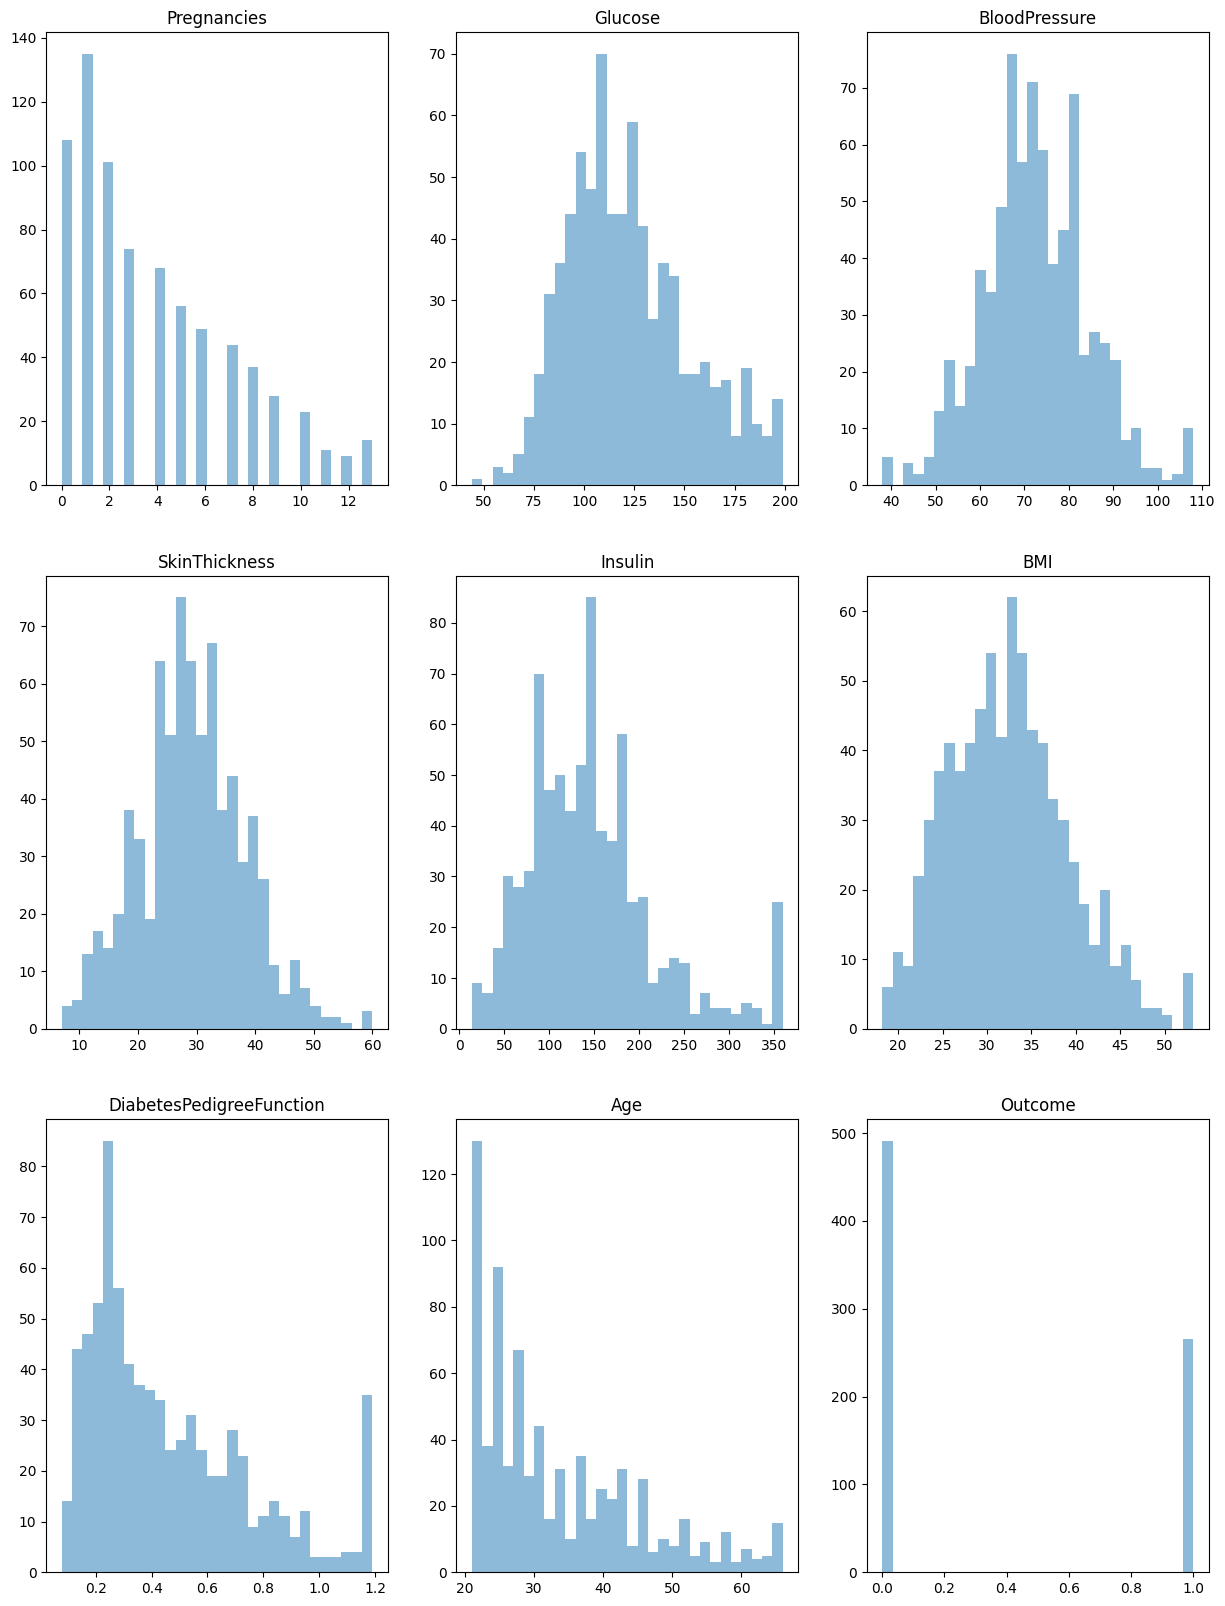

In [21]:
# Danh sách tên các cột ban đầu, trừ 'Outcome'
column_names = df.columns[:-1].tolist()  

# Ghép lại X và y thành một DataFrame
df_new = pd.DataFrame(X, columns=column_names)
df_new['Outcome'] = y

# Hiển thị DataFrame mới
print(df_new.head())

# Vẽ lại biểu đồ histogram
drawHist(df_new)

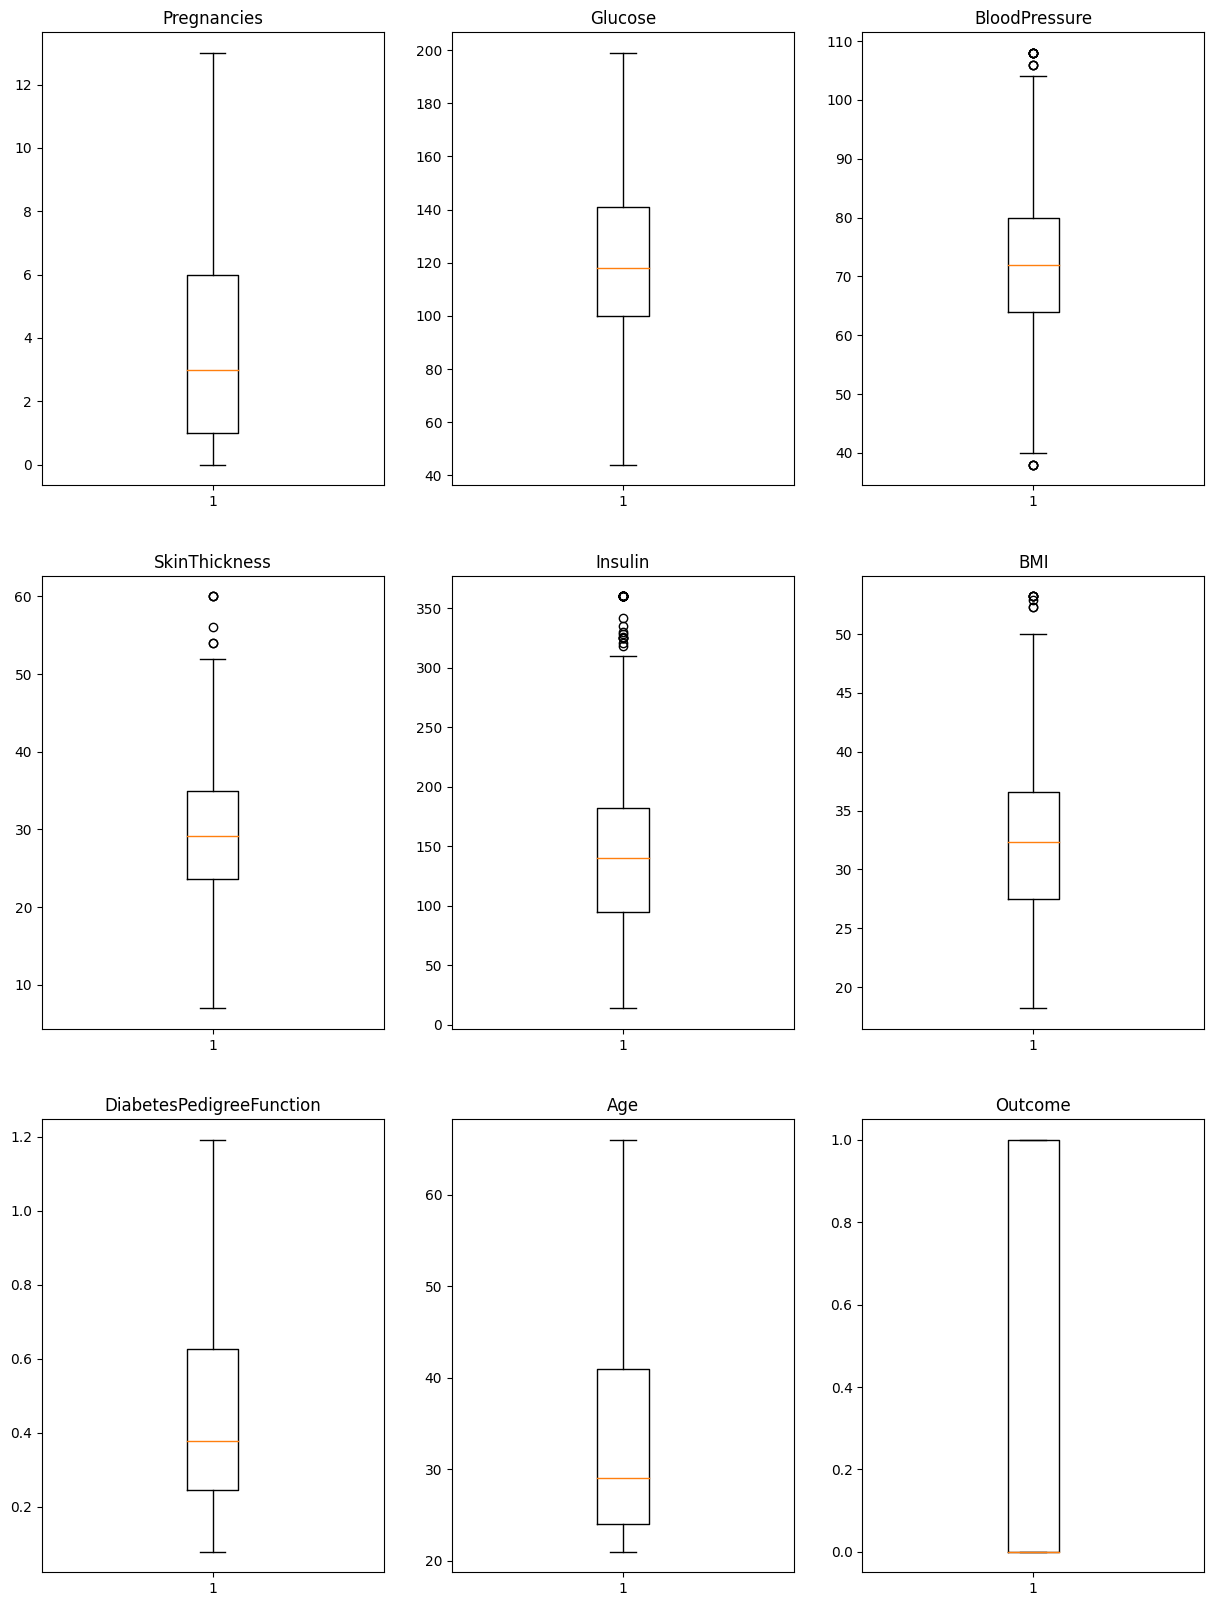

In [22]:
drawBox(df_new)

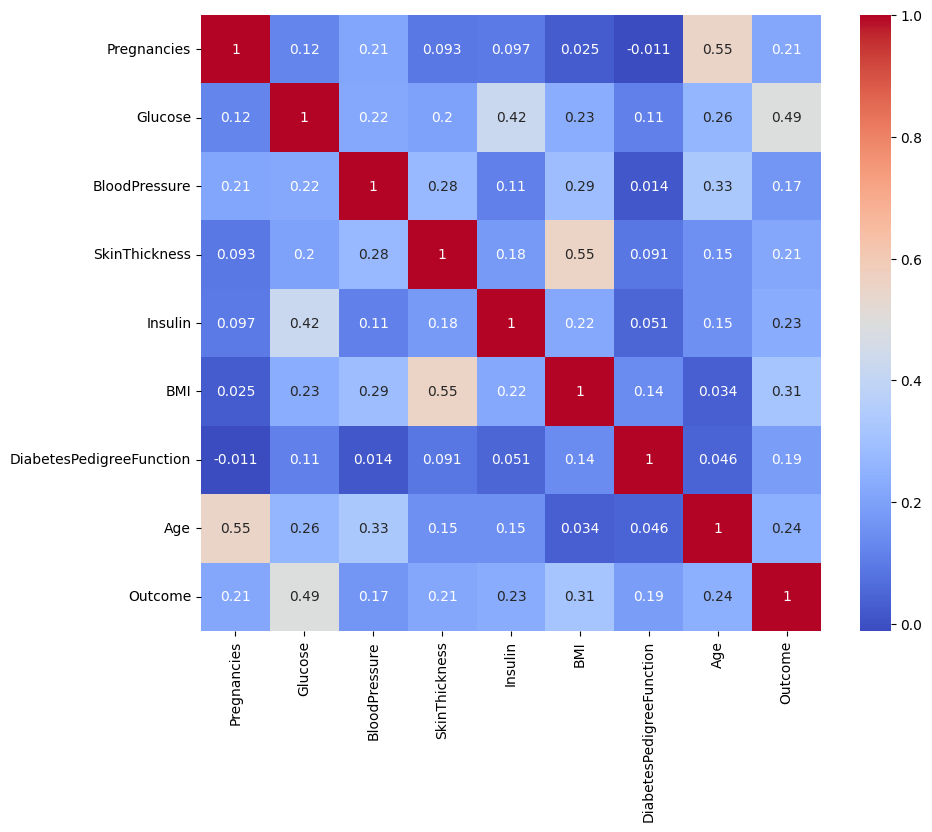

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
#Split dataset thành train_set(85%) và test_set(15%)

from sklearn.model_selection import train_test_split
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [25]:
#Chuẩn hóa dữ liệu (feature scaling)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0, 1, 2, 3, 4, 5, 6, 7]] = sc.fit_transform(X_train[:, [0, 1, 2, 3, 4, 5, 6, 7]])

In [26]:
X_train

array([[ 1.60018414, -1.03157476, -0.37693419, ..., -1.21825548,
        -0.90159619,  2.09352452],
       [-0.55043659,  0.76030421, -0.20933775, ..., -0.66365904,
        -0.41441326, -0.38067701],
       [-0.85766812, -0.54288049, -0.20933775, ...,  0.24120882,
        -1.10784882, -0.97789807],
       ...,
       [ 1.29295261,  0.04355262,  0.29345157, ..., -0.56149654,
         0.83021466,  1.58162075],
       [-0.85766812, -0.03181176, -0.37693419, ..., -0.07987333,
        -0.22949711, -0.97789807],
       [-0.85766812, -1.19447285, -0.54453064, ...,  1.27742847,
         1.64811301, -0.38067701]])

In [27]:
X_test[:, [0, 1, 2, 3, 4, 5, 6, 7]] = sc.transform(X_test[:, [0, 1, 2, 3, 4, 5, 6, 7]])

In [28]:
#Cân bằng data
from imblearn.over_sampling import ADASYN

# Khởi tạo ADASYN với tỷ lệ sampling_strategy (cân bằng data)
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=5, random_state=101)

# Áp dụng ADASYN để tạo thêm các mẫu tổng hợp từ tập huấn luyện
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Kiểm tra lại kích thước của tập dữ liệu sau khi resampling
print("Kích thước ban đầu của X_train:", X_train.shape)
print("Kích thước sau khi ADASYN của X_train_resampled:", X_train_resampled.shape)

Kích thước ban đầu của X_train: (643, 8)
Kích thước sau khi ADASYN của X_train_resampled: (805, 8)


In [29]:
# Hiển thị phân phối của nhãn trong tập dữ liệu sau khi resampling
print("Phân phối nhãn ban đầu:", np.bincount(y_train))
print("Phân phối nhãn sau khi ADASYN:", np.bincount(y_train_resampled))

Phân phối nhãn ban đầu: [411 232]
Phân phối nhãn sau khi ADASYN: [411 394]


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression(random_state=101, max_iter=1000)

# Train mô hình trên tập dữ liệu đã được cân bằng (sau khi áp dụng ADASYN)
logreg.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập test
y_pred = logreg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Báo cáo phân loại (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 79.82%
Confusion Matrix:
[[66 14]
 [ 9 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        80
           1       0.64      0.74      0.68        34

    accuracy                           0.80       114
   macro avg       0.76      0.78      0.77       114
weighted avg       0.81      0.80      0.80       114

